In [1]:
import wrangle

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches


# pd.reset_option('display.max_rows')
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [2]:
df = wrangle.get_curriculum_logs_data()
df.dropna(inplace = True)
df.head()

The df has 847330 rows and 10 columns.


cohortid start_date   end_date cohortname  program_id       date      time  \
0         1 2014-02-04 2014-04-22     Arches           1 2018-01-26  10:14:47   
1         1 2014-02-04 2014-04-22     Arches           1 2018-01-26  10:14:51   
2         1 2014-02-04 2014-04-22     Arches           1 2018-01-26  10:15:02   
3         1 2014-02-04 2014-04-22     Arches           1 2018-01-26  11:46:29   
4         1 2014-02-04 2014-04-22     Arches           1 2018-01-26  11:46:39   

                                                path  user_id            ip  \
0                                                  /       11  97.105.19.61   
1                                       javascript-i       11  97.105.19.61   
2                             javascript-i/functions       11  97.105.19.61   
3  appendix/further-reading/javascript/hoisting.html       11  97.105.19.61   
4                                           appendix       11  97.105.19.61   

  program_name  is_staff  
0      web_dev     False  
1      web_dev     False  
2      web_dev     False  
3      web_dev     False  
4      web_dev     False

### Questions to Explore...
- Q1: Which lesson appears to attract the most traffic consistently across cohorts (per program)?
- Q2: Is there a cohort that referred to a lesson significantly more than other cohorts seemed to gloss over?
- Q7: Which lessons are least accessed?
<hr>
- Q5: At some point in 2019, the ability for students and alumni to access both curriculums (web dev to ds, ds to web dev) should have been shut off. Do you see any evidence of that happening? Did it happen before?
- Q8: Anything else I should be aware of?

## Q1: Which lesson appears to attract the most traffic consistently across cohorts (per program)?
In order to answer this question I will start by exploring the values in the `path` column.

In [3]:
df.path.value_counts()

/                                                                                                                                                                                                                                                                                                                         45854
javascript-i                                                                                                                                                                                                                                                                                                              18203
toc                                                                                                                                                                                                                                                                                                                       17591
search/search_index.json                

This gives me a pretty good idea of the lessons from each log.
#### Now I want to be able to look at `path` values across `program_name` . . .

In [4]:
df.head(2)

cohortid start_date   end_date cohortname  program_id       date      time  \
0         1 2014-02-04 2014-04-22     Arches           1 2018-01-26  10:14:47   
1         1 2014-02-04 2014-04-22     Arches           1 2018-01-26  10:14:51   

           path  user_id            ip program_name  is_staff  
0             /       11  97.105.19.61      web_dev     False  
1  javascript-i       11  97.105.19.61      web_dev     False

In [5]:
# looking at the path value_counts by cohorts, starting with web_dev
df[(df.path != '/') & (df.program_name == 'web_dev')].path.value_counts().head(10)

javascript-i                18193
toc                         17580
search/search_index.json    15331
java-iii                    13162
html-css                    13111
java-ii                     12173
spring                      11877
jquery                      11037
mysql                       10602
java-i                      10460
Name: path, dtype: int64

In [6]:
# the values and value_counts() for the top 10 data_science paths
df[(df.path != '/') & (df.program_name == 'data_science')].path.value_counts().head(10)

search/search_index.json                    2203
classification/overview                     1785
1-fundamentals/modern-data-scientist.jpg    1655
1-fundamentals/AI-ML-DL-timeline.jpg        1651
1-fundamentals/1.1-intro-to-data-science    1633
classification/scale_features_or_not.svg    1590
fundamentals/AI-ML-DL-timeline.jpg          1443
fundamentals/modern-data-scientist.jpg      1438
sql/mysql-overview                          1424
fundamentals/intro-to-data-science          1413
Name: path, dtype: int64

### Now to visualize...

In [7]:
# looking at unique program_names
df.program_name.unique()

array(['web_dev', 'data_science'], dtype=object)

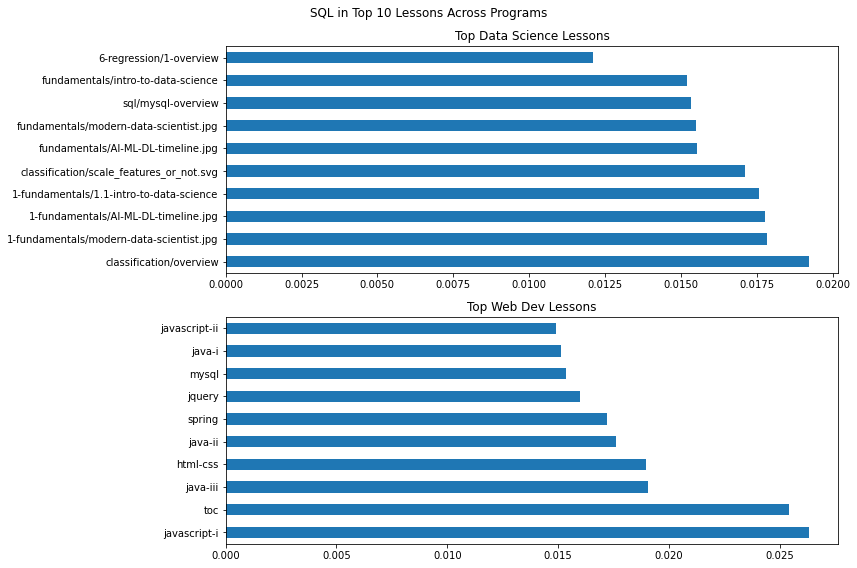

In [8]:
# setting figure size
plt.figure(figsize = (12, 8))

# subplot 1 (top) data science lessons
plt.subplot(2, 1, 1)
df[(df.path != '/') & (df.program_name == 'data_science') & (df.path != 'search/search_index.json')]\
                                                                .path.value_counts(sorted).head(10).plot.barh()
plt.title('Top Data Science Lessons')

# subplot 2 (bottom) web dev lesson
plt.subplot(2, 1, 2)
df[(df.path != '/') & (df.program_name == 'web_dev') & (df.path != 'search/search_index.json')]\
                                                            .path.value_counts(sorted).head(10).plot.barh()
plt.title('Top Web Dev Lessons')

# figure title
plt.suptitle('SQL in Top 10 Lessons Across Programs')
plt.tight_layout()
plt.show();


>## A1: `SQL` appears in the top 10 paths across both programs.
`SQL`, 8th most acessed lesson across both the `web_dev` and `data_science` programs

## Q2: Is there a cohort that referred to a lesson significantly more than other cohorts seemed to gloss over?
To answer this question I will continue looking at the `path` values but will do a groupby with  `cohortname`

In [9]:
paths = df.groupby(['path', 'cohortname']).sum().reset_index().sort_values(by = 'user_id', ascending = False)

In [10]:
# excluding / path and Staff cohortname
paths = paths[(paths.path != '/') & (paths.cohortname != 'Staff') & (paths.cohortname != 'Hampton')]

In [11]:
# concatenating the top and bottom values
pd.concat([paths.head(50), paths.tail(50)]).groupby(['path', 'cohortname']).sum()\
                            .sort_values(by = 'cohortid')

cohortid  \
path                                               cohortname             
appendix/further-reading/javascript/hoisting.html  Arches             1   
content/html-css/css-i/selectors-and-properties... Arches             1   
content/html-css/css-i/positioning.html            Arches             1   
content/php_ii/gitbook/images/favicon.ico          Arches             1   
content/html-css/css-i/box-model.html              Arches             1   
content/php_iii/classes-and-objects-i/gitbook/i... Arches             1   
appendix/postwork/mars-rover                       Arches             1   
content/php_ii/functions-i/gitbook/images/favic... Arches             1   
content/php_ii/functions-i/arguments.html          Arches             1   
javascript-ii/promisesdfghjkjhgfs                  Arches             1   
content/html-css/css-i                             Sequoia           21   
content/html-css/css-i/selectors-and-properties... Sequoia           21   
content/php_iii/gitbook/images/favicon.ico         Sequoia           21   
examples/javascript/blog.json                      Sequoia           21   
spring/fundamentals/integration-tests              Sequoia           21   
spring/extra-features/error-pages/asdfasdf         Sequoia           21   
content/php_iii                                    Sequoia           21   
content/html-css/css-i/gitbook/images/favicon.ico  Sequoia           21   
pair-programming                                   Teddy             22   
content/php_iii/php-with-html/handling-user-inp... Teddy             22   
content/php_iii/php-with-html/view-controller-s... Teddy             22   
content/php_iii/classes-and-objects-i              Teddy             22   
git/working-in-teams                               Teddy             22   
content/php_iii/php-with-html/get-with-php.html    Teddy             22   
ordinary_least_squares.jpeg                        Teddy             22   
1-fundamentals/project                             Teddy             22   
git/merge-conflict-demo                            Teddy             22   
appendix/angular/dependencies                      Teddy             22   
4_introduction_to_sklearn                          Teddy             22   
4.6.4_introduction_to_seaborn                      Teddy             22   
4_Objects                                          Teddy             22   
4_Matplotlib_Styles                                Teddy             22   
content/mysql/relationships/sub-queries.html       Teddy             22   
2.00.05_Charts_PivotTables_Sparklines              Teddy             22   
4.6.1_introduction_to_matplotlib                   Teddy             22   
appendix/vocabulary                                Teddy             22   
2.00.01_Intro_Excel                                Teddy             22   
content/html-css/css-i/gitbook/images/favicon.ico  Teddy             22   
content/jquery/ajax/gitbook/images/favicon.ico     Teddy             22   
content/laravel/intro/application-structure.html   Teddy             22   
appendix/data-viz-references                       Teddy             22   
content/php_iii/php-with-html                      Teddy             44   
content/php_iii/php-with-html/alternative-synta... Teddy             44   
introduction-to-java                               Teddy             44   
content/php_iv/php-with-mysql/executing-queries... Teddy             44   
es6                                                Teddy             44   
file-io                                            Teddy             44   
content/php_i/types-and-variables-ii/gitbook/im... Teddy             44   
content/php_iv/php-with-mysql/query-and-results... Teddy             66   
content/php_iv/php-with-mysql/connect-to-db.html   Teddy             66   
toc                                                Ceres          30063   
javascript-i                                       Ceres          33099   
anomaly-detec

#### Using groupby `path` and then `cohortname` is giving me what I need to see but the `path` includes subcomponents and is giving me too many results to be able to meaningfully answer this question.
I am going to `split` the path and use the 2nd part of the path to create a new column called `lesson`

In [12]:
cohort_paths = df[df.path != '/'].groupby(['path', 'cohortname']).agg('sum').reset_index()[['path', 'cohortname', 'user_id']]
cohort_paths

path  cohortname  user_id
0                        %20https://github.com/RaulCPena       Curie      580
1                                                      '       Staff       64
2                       ,%20https://github.com/RaulCPena       Curie      580
3                                                   .git   Voyageurs      203
4                                             .gitignore      Darden      696
5                                             .gitignore   Voyageurs      203
6                            .well-known/assetlinks.json    Hyperion     1350
7                                                    00_       Staff        1
8                                               00_index       Staff      501
9                                               00_index    Wrangell      564
10                                              01_intro       Staff      501
11                                              01_intro    Wrangell      564
12                                      02_listing_files       Staff      503
13                                      02_listing_files    Wrangell      282
14                                         03_file_paths       Staff      751
15                                         03_file_paths    Wrangell      282
16                          04_navigating_the_filesystem       Staff      257
17                          04_navigating_the_filesystem    Wrangell      282
18                     05_creating_files_and_directories       Staff      256
19                     05_creating_files_and_directories    Wrangell      282
20                                       06_moving_files       Staff      254
21                                        07_more_topics       Staff      254
22                           0_Classification_Algorithms      Arches      248
23                           0_Classification_Algorithms     Hampton        1
24                                        1-fundamentals      Darden     6926
25                1-fundamentals/1-fundamentals-overview       Staff     6813
26                1-fundamentals/1-fundamentals-overview       Teddy       18
27                1-fundamentals/1-fundamentals-overview     Ulysses      171
28                1-fundamentals/1-fundamentals-overview   Voyageurs      558
29                1-fundamentals/1-fundamentals-overview        Zion      344
30                1-fundamentals/1-intro-to-data-science       Staff      674
31              1-fundamentals/1.1-intro-to-data-science   Andromeda      373
32              1-fundamentals/1.1-intro-to-data-science       Bayes   305426
33              1-fundamentals/1.1-intro-to-data-science  Betelgeuse     3710
34              1-fundamentals/1.1-intro-to-data-science       Ceres     3142
35              1-fundamentals/1.1-intro-to-data-science       Curie   269012
36              1-fundamentals/1.1-intro-to-data-science      Darden   308238
37              1-fundamentals/1.1-intro-to-data-science      Easley     6738
38              1-fundamentals/1.1-intro-to-data-science    Florence    57944
39              1-fundamentals/1.1-intro-to-data-science     Glacier     3591
40              1-fundamentals/1.1-intro-to-data-science      Lassen       53
41              1-fundamentals/1.1-intro-to-data-science      Quincy      188
42              1-fundamentals/1.1-intro-to-data-science     Sequoia      205
43              1-fundamentals/1.1-intro-to-data-science       Staff    46874
44              1-fundamentals/1.1-intro-to-data-science       Teddy      156
45              1-fundamentals/1.1-intro-to-data-science     Ulysses      419
46              1-fundamentals/1.1-intro-to-data-science   Voyageurs      699
47              1-fundamentals/1.2-data-science-pipeline   Andromeda      373
48              1-fundamentals/1.2-data-science-pipeline       Bayes   104329
49              1-fundamentals/1.2-data-science-pipeline  Betelgeuse      410
50              1-fundamentals/1.2-data-science-pipeline       Curie    85

#### This is useful, but also a lot of info. After a conversation with an instructor, I want to focus on the more recent cohorts.
I am now going to look at the cohorts by program and get their `start_date` and `end_date` and then sort and filter so I only see the cohorts that ended within the last 12 months. Then I can look at the path info again but only for those cohorts.

In [13]:
cohort_info = df.groupby(['program_name', 'cohortname', 'start_date', 'end_date']).agg('count').reset_index()[['program_name', 'cohortname', 'start_date', 'end_date']]
cohort_info

program_name  cohortname start_date   end_date
0   data_science       Bayes 2019-08-19 2020-01-30
1   data_science       Curie 2020-02-03 2020-07-07
2   data_science      Darden 2020-07-13 2021-01-12
3   data_science      Easley 2020-12-07 2021-06-08
4   data_science    Florence 2021-03-15 2021-09-03
5        web_dev   Andromeda 2019-03-18 2019-07-30
6        web_dev        Apex 2020-02-24 2020-07-29
7        web_dev      Apollo 2015-03-30 2015-07-29
8        web_dev      Arches 2014-02-04 2014-04-22
9        web_dev    Badlands 2014-06-04 2014-08-22
10       web_dev        Bash 2020-07-20 2021-01-21
11       web_dev  Betelgeuse 2019-05-28 2019-10-08
12       web_dev       Ceres 2019-07-15 2019-12-11
13       web_dev      Deimos 2019-09-16 2020-02-27
14       web_dev      Denali 2014-10-20 2015-01-18
15       web_dev      Europa 2019-11-04 2020-04-17
16       web_dev  Everglades 2014-11-18 2015-02-24
17       web_dev     Fortuna 2020-01-13 2020-06-23
18       web_dev    Franklin 2015-02-03 2015-05-26
19       web_dev    Ganymede 2020-03-23 2020-08-20
20       web_dev     Glacier 2015-06-05 2015-10-06
21       web_dev     Hampton 2015-09-22 2016-02-06
22       web_dev    Hyperion 2020-05-26 2020-11-10
23       web_dev         Ike 2016-01-20 2016-05-12
24       web_dev      Joshua 2016-03-08 2016-06-30
25       web_dev     Jupiter 2020-09-21 2021-03-30
26       web_dev     Kalypso 2020-11-02 2021-05-04
27       web_dev       Kings 2016-05-23 2016-09-15
28       web_dev      Lassen 2016-07-18 2016-11-10
29       web_dev        Luna 2020-12-07 2021-06-08
30       web_dev     Mammoth 2016-09-26 2017-02-02
31       web_dev       Marco 2021-01-25 2021-07-19
32       web_dev     Neptune 2021-03-15 2021-09-03
33       web_dev     Niagara 2016-10-26 2017-03-09
34       web_dev      Oberon 2021-04-12 2021-10-01
35       web_dev     Olympic 2017-02-06 2017-05-25
36       web_dev   Pinnacles 2017-03-27 2017-07-20
37       web_dev      Quincy 2017-06-05 2017-09-22
38       web_dev     Sequoia 2017-09-27 2018-02-15
39       web_dev       Staff 2014-02-04 2014-02-04
40       web_dev       Teddy 2018-01-08 2018-05-17
41       web_dev     Ulysses 2018-03-05 2018-07-19
42       web_dev   Voyageurs 2018-05-29 2018-10-11
43       web_dev    Wrangell 2018-07-23 2018-11-29
44       web_dev      Xanadu 2018-09-17 2019-02-08
45       web_dev    Yosemite 2018-11-05 2019-04-03
46       web_dev        Zion 2019-01-22 2019-06-04

In [14]:
# cohorts, filtered by end date within the 18mos
cohort_info2 = cohort_info.sort_values(by = ['program_name', 'start_date'], ascending = False)
cohort_info2 = cohort_info2[cohort_info2.end_date > '2020-06-30']

In [15]:
cohort_info2

program_name cohortname start_date   end_date
34       web_dev     Oberon 2021-04-12 2021-10-01
32       web_dev    Neptune 2021-03-15 2021-09-03
31       web_dev      Marco 2021-01-25 2021-07-19
29       web_dev       Luna 2020-12-07 2021-06-08
26       web_dev    Kalypso 2020-11-02 2021-05-04
25       web_dev    Jupiter 2020-09-21 2021-03-30
10       web_dev       Bash 2020-07-20 2021-01-21
22       web_dev   Hyperion 2020-05-26 2020-11-10
19       web_dev   Ganymede 2020-03-23 2020-08-20
6        web_dev       Apex 2020-02-24 2020-07-29
4   data_science   Florence 2021-03-15 2021-09-03
3   data_science     Easley 2020-12-07 2021-06-08
2   data_science     Darden 2020-07-13 2021-01-12
1   data_science      Curie 2020-02-03 2020-07-07

### Now I have a df where I can see the most recent x8 cohorts with their start and end dates by program. 
I will use this to filter the cohort path info and also keep this df for reference.

In [16]:
# creating a list of recent cohorts
recent_cohorts = list(cohort_info2.cohortname.unique())
recent_cohorts


['Oberon',
 'Neptune',
 'Marco',
 'Luna',
 'Kalypso',
 'Jupiter',
 'Bash',
 'Hyperion',
 'Ganymede',
 'Apex',
 'Florence',
 'Easley',
 'Darden',
 'Curie']

In [23]:
recent_paths = cohort_paths[(cohort_paths.cohortname == 'Oberon') | (cohort_paths.cohortname == 'Neptune') | \
             (cohort_paths.cohortname == 'Marco') | (cohort_paths.cohortname == 'Luna') | \
             (cohort_paths.cohortname == 'Kalypso') | (cohort_paths.cohortname == 'Jupiter') | \
    (cohort_paths.cohortname == 'Florence') | (cohort_paths.cohortname == 'Easley') | \
                           (cohort_paths.cohortname == 'Darden') | (cohort_paths.cohortname == 'Curie')]

recent_paths.sort_values(by = ['path', 'user_id'])

path cohortname  user_id
0                        %20https://github.com/RaulCPena      Curie      580
2                       ,%20https://github.com/RaulCPena      Curie      580
4                                             .gitignore     Darden      696
24                                        1-fundamentals     Darden     6926
37              1-fundamentals/1.1-intro-to-data-science     Easley     6738
38              1-fundamentals/1.1-intro-to-data-science   Florence    57944
35              1-fundamentals/1.1-intro-to-data-science      Curie   269012
36              1-fundamentals/1.1-intro-to-data-science     Darden   308238
50              1-fundamentals/1.2-data-science-pipeline      Curie    85153
51              1-fundamentals/1.2-data-science-pipeline     Darden   189366
58                      1-fundamentals/1.3-pipeline-demo      Curie    35002
59                      1-fundamentals/1.3-pipeline-demo     Darden    74460
68                     1-fundamentals/2.1-excel-overview     Easley    13458
66                     1-fundamentals/2.1-excel-overview      Curie    26802
67                     1-fundamentals/2.1-excel-overview     Darden    36313
75              1-fundamentals/2.1-spreadsheets-overview     Easley     1670
74              1-fundamentals/2.1-spreadsheets-overview     Darden    10174
73              1-fundamentals/2.1-spreadsheets-overview      Curie    42541
82                    1-fundamentals/2.2-excel-functions     Easley     5907
79                    1-fundamentals/2.2-excel-functions      Curie    15745
80                    1-fundamentals/2.2-excel-functions     Darden    23680
89                          1-fundamentals/2.2-functions     Easley     2514
88                          1-fundamentals/2.2-functions     Darden    12385
87                          1-fundamentals/2.2-functions      Curie    52449
92                      1-fundamentals/2.3-visualization      Curie     1162
96           1-fundamentals/2.3-visualization-with-excel     Easley     5041
95           1-fundamentals/2.3-visualization-with-excel     Darden    37173
94           1-fundamentals/2.3-visualization-with-excel      Curie    51355
101                  1-fundamentals/2.3-visualization.md      Curie     1155
104               1-fundamentals/2.4-more-excel-features      Curie     9322
106               1-fundamentals/2.4-more-excel-features     Easley    16826
105               1-fundamentals/2.4-more-excel-features     Darden    42570
111                          1-fundamentals/3-vocabulary      Curie    33260
112                          1-fundamentals/3-vocabulary     Darden    44874
122                 1-fundamentals/AI-ML-DL-timeline.jpg     Easley     5887
123                 1-fundamentals/AI-ML-DL-timeline.jpg   Florence    55226
120                 1-fundamentals/AI-ML-DL-timeline.jpg      Curie   271343
121                 1-fundamentals/AI-ML-DL-timeline.jpg     Darden   315049
135                   1-fundamentals/DataToAction_v2.jpg      Curie    86349
136                   1-fundamentals/DataToAction_v2.jpg     Darden   198276
147             1-fundamentals/modern-data-scientist.jpg     Easley     5887
148             1-fundamentals/modern-data-scientist.jpg   Florence    55226
145             1-fundamentals/modern-data-scientist.jpg      Curie   272501
146             1-fundamentals/modern-data-scientist.jpg     Darden   315055
166                            1.2-data-science-pipeline     Darden     3447
167                                    1.3-pipeline-demo     Darden     2769
182                      10-anomaly-detection/1-overview     Darden    14272
181                      10-anomaly-detection/1-overview      Curie   202576
189    10-anomaly-detection/2-continuous-probabilisti...     Darden     1370
188    10-anomaly-detection/2-continuous-probabilisti...      Curie    39930
201    10-anomaly-detection/3-discrete-probabilistic-...     Darden     2740
200    10-anomaly-detection/3-discrete-probabili

### Data Science Lessons
Lesson | Hit Hard | Qty | Glossed Over | Qty
:--- | :--- | :--- | :--- | :--- 
`stats/probability-distributions` | `Darden`, `Florence`, `Easley` | *Multi* | `Florence` | 907
appendix/data_science_community | Darden, Florence, Easley, Curie | *Multi* | `Curie` | 580
`10-anomaly-detection/5-detecting-with-clustering` | `Curie` | 38030 | `Darden` | 685
`11-nlp/6-model`| `Curie`| 48807 | `Darden`| 685
`2-storytelling/3-tableau` | `Curie` | 39146 | `Darden` | 6232

### Web Dev Lessons
Lesson | Hit Hard | Qty | Glossed Over | Qty
:--- | :--- | :--- | :--- | :--- 
`web-design/ux/purpose` | `Jupiter` | 14393 | `Luna`, `Kalypso`, `Marco` | *Multi*
`web-design/ux/layout` | `Jupiter` | 13713 | `Luna`, `Kalypso`, `Marco` | *Multi* 
`spring/fundamentals/relationships` | `Jupiter`, `Kalypso` | *Multi* | `Marco`, `Luna` | *Multi*



In [22]:
cohort_info2

program_name cohortname start_date   end_date
34       web_dev     Oberon 2021-04-12 2021-10-01
32       web_dev    Neptune 2021-03-15 2021-09-03
31       web_dev      Marco 2021-01-25 2021-07-19
29       web_dev       Luna 2020-12-07 2021-06-08
26       web_dev    Kalypso 2020-11-02 2021-05-04
25       web_dev    Jupiter 2020-09-21 2021-03-30
10       web_dev       Bash 2020-07-20 2021-01-21
22       web_dev   Hyperion 2020-05-26 2020-11-10
19       web_dev   Ganymede 2020-03-23 2020-08-20
6        web_dev       Apex 2020-02-24 2020-07-29
4   data_science   Florence 2021-03-15 2021-09-03
3   data_science     Easley 2020-12-07 2021-06-08
2   data_science     Darden 2020-07-13 2021-01-12
1   data_science      Curie 2020-02-03 2020-07-07